In [8]:
%matplotlib inline
import matplotlib.pyplot as plt
import matplotlib as mpl
import numpy as np
import pandas as pd
import seaborn as sns
import os

In [19]:
df = pd.read_csv("/Users/mariobevilacquad/AI_RETAIL/POS_data.csv")

In [20]:
df

,Date,Time,Transaction,Item
0,10/30/2016,9:58:11,1,Bread
1,10/30/2016,10:05:34,2,Scandinavian
2,10/30/2016,10:05:34,2,Scandinavian
3,10/30/2016,10:07:57,3,Hot chocolate
4,10/30/2016,10:07:57,3,Jam
...,...,...,...,...
21288,4/9/2017,14:32:58,9682,Coffee
21289,4/9/2017,14:32:58,9682,Tea
21290,4/9/2017,14:57:06,9683,Coffee
21291,4/9/2017,14:57:06,9683,Pastry


In [ ]:
# Created 2 Dataframes, based on Timestamp in order to better compare and see the POS for 2016 & 2017
df['Time_stamp'] = pd.to_datetime(df['Date'] + ' ' + df['Time'])

# Separate data for 2016 and 2017
df_2016 = df[df['Time_stamp'].dt.year == 2016]
df_2017 = df[df['Time_stamp'].dt.year == 2017]

In [71]:
df_2017

,Date,Time,Transaction,Item,Time_stamp
8561,1/1/2017,1900-01-01 01:21:05,4090,Bread,2017-01-01 01:21:05
8562,1/3/2017,1900-01-01 09:08:01,4094,Coffee,2017-01-03 09:08:01
8563,1/3/2017,1900-01-01 09:14:31,4095,Coffee,2017-01-03 09:14:31
8564,1/3/2017,1900-01-01 09:14:31,4095,Toast,2017-01-03 09:14:31
8565,1/3/2017,1900-01-01 09:17:54,4096,Farm House,2017-01-03 09:17:54
...,...,...,...,...,...
21288,4/9/2017,1900-01-01 14:32:58,9682,Coffee,2017-04-09 14:32:58
21289,4/9/2017,1900-01-01 14:32:58,9682,Tea,2017-04-09 14:32:58
21290,4/9/2017,1900-01-01 14:57:06,9683,Coffee,2017-04-09 14:57:06
21291,4/9/2017,1900-01-01 14:57:06,9683,Pastry,2017-04-09 14:57:06


In [86]:
#Identifying the amount of unique products in the dataset
num_products = df.Item.nunique()
print('There are', num_products, 'unique products')

There are 95 unique products


## Obtaining TOP SALES in all POS and in each year

As we can see in the above information, the top product distribution varies in the 3 cases. 
1) In overall sales, the top 10 is composed of Coffee, Bread, Tea, Cake, Sandwich, Pastry, NONE, Cookies, Hot Chocolatem and Medialuna.
2) In 2016, the top 10 is composed of Coffee, Bread, Tea, NONE, Medialuna, Pastry, Cake, Hot Chocolate, Sandwich and Farm House. 
3) In 2017, the top 10 is composed of Coffee, Bread, Tea, Cake, Sandwich, Pastry, Cookies, NONE, Hot Chocolate and Juice. 

Conclusion: 

    - TOP 3 most sold products remained the same in 2016 and 2017, achieving the TOP 3 products in OVERALL. 
    - Most of the Products in the TOP 10 are similar, with exception of certain products. 

In [87]:
# 'Transaction' column represents sales
top_products = df.groupby('Item')['Transaction'].sum().reset_index()

top_products = top_products.sort_values(by='Transaction', ascending=False)

print("Top Products by Sales:")
print(top_products.head(10))

Top Products by Sales:
             Item  Transaction
23         Coffee     27084057
11          Bread     16213533
84            Tea      7030856
15           Cake      5932362
74       Sandwich      4344466
66         Pastry      4098061
62           NONE      3395760
26        Cookies      2930952
48  Hot chocolate      2796539
55      Medialuna      2350450


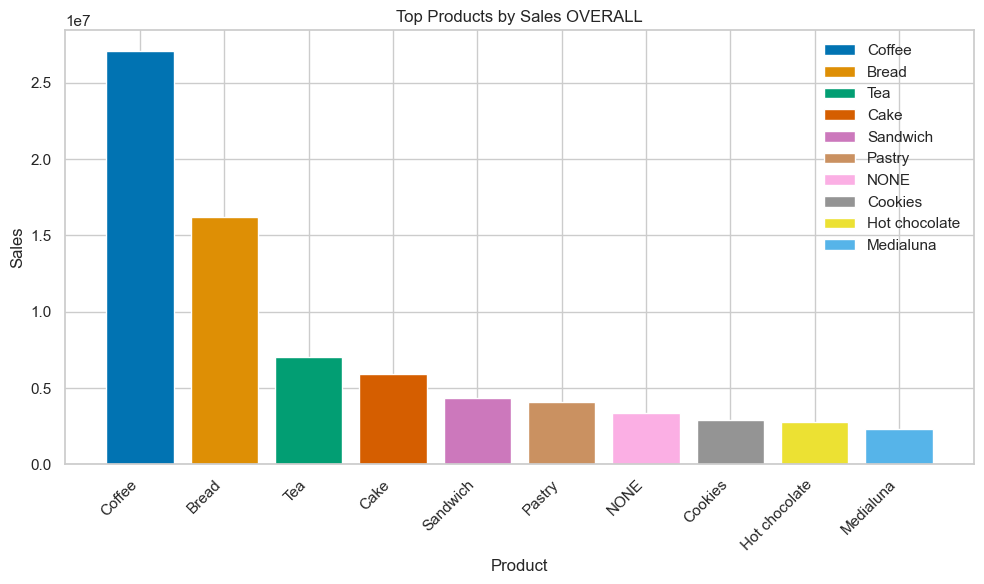

In [57]:
# PLOT the top products 
plt.figure(figsize=(10, 6))
colors = sns.color_palette("colorblind", n_colors=len(top_products))
bars = plt.bar(top_products['Item'][:10], top_products['Transaction'][:10], color=colors)
plt.xlabel('Product')
plt.ylabel('Sales')
plt.title('Top Products by Sales OVERALL')
plt.xticks(rotation=45, ha='right')
plt.legend(bars, top_products['Item'][:10], loc='upper right')
plt.tight_layout()
plt.show()

In [88]:
#2016

top_products_2016 = df_2016.groupby('Item')['Transaction'].sum().reset_index()
top_products_2016 = top_products_2016.sort_values(by='Transaction', ascending=False)

# Display the top products
print("Top Products by Sales:")
print(top_products_2016.head(10))

Top Products by Sales:
             Item  Transaction
16         Coffee      4566949
8           Bread      2970019
63            Tea      1164639
48           NONE      1011859
42      Medialuna       728831
51         Pastry       665753
12           Cake       640456
35  Hot chocolate       629329
55       Sandwich       562000
26     Farm House       372385


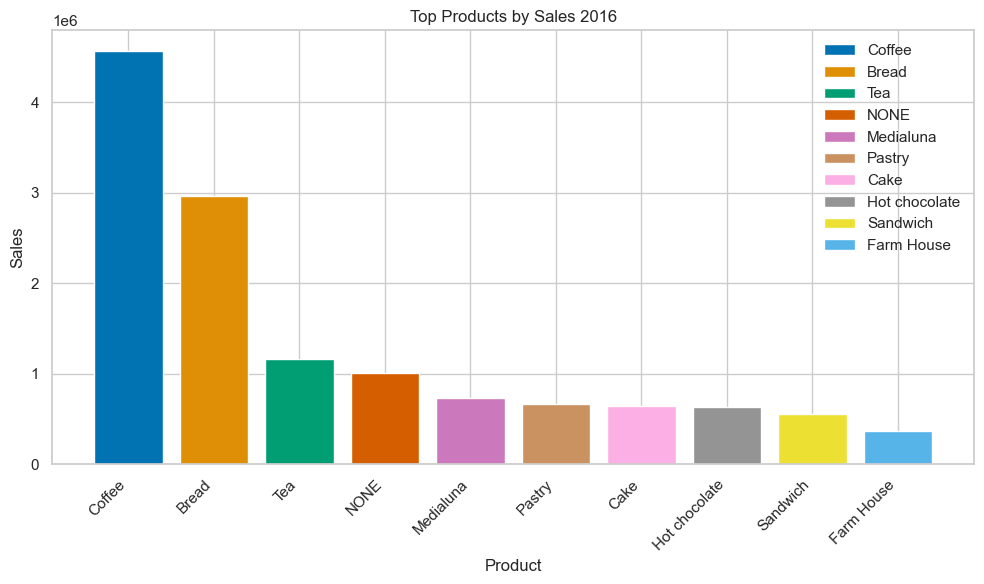

In [58]:
# PLOT the top products 
plt.figure(figsize=(10, 6))
colors = sns.color_palette("colorblind", n_colors=len(top_products_2016))
bars = plt.bar(top_products_2016['Item'][:10], top_products_2016['Transaction'][:10], color=colors)
plt.xlabel('Product')
plt.ylabel('Sales')
plt.title('Top Products by Sales 2016')
plt.xticks(rotation=45, ha='right')
plt.legend(bars, top_products_2016['Item'][:10], loc='upper right')
plt.tight_layout()
plt.show()

In [52]:
#2017

top_products_2017 = df_2017.groupby('Item')['Transaction'].sum().reset_index()
top_products_2017 = top_products_2017.sort_values(by='Transaction', ascending=False)

# Display the top products
print("Top Products by Sales:")
print(top_products_2017.head(10))

Top Products by Sales:
             Item  Transaction
15         Coffee     22517108
7           Bread     13243514
59            Tea      5866217
10           Cake      5291906
52       Sandwich      3782466
47         Pastry      3432308
18        Cookies      2599566
45           NONE      2383901
35  Hot chocolate      2167210
38          Juice      1870406


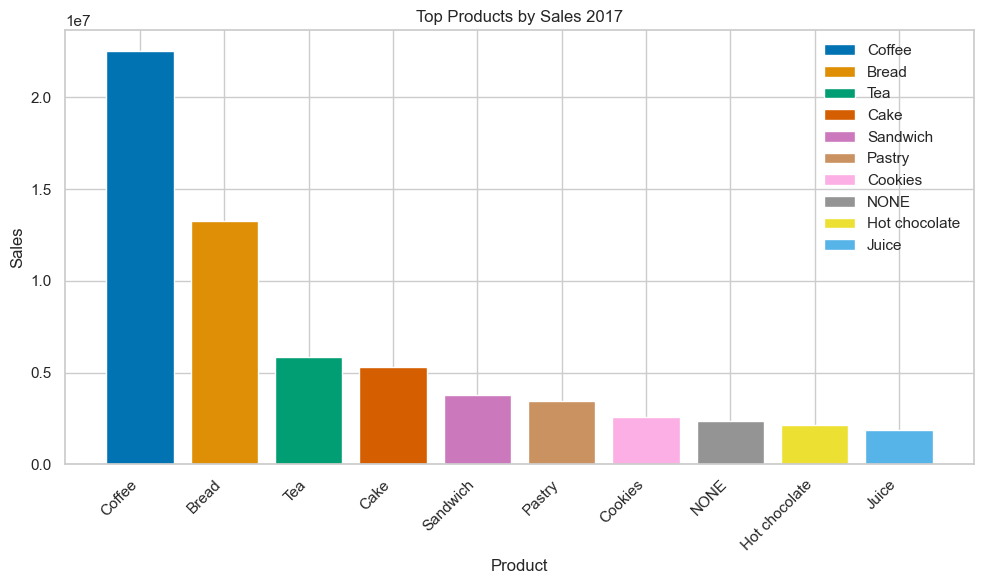

In [59]:
# PLOT the top products 
plt.figure(figsize=(10, 6))
colors = sns.color_palette("colorblind", n_colors=len(top_products_2017))
bars = plt.bar(top_products_2017['Item'][:10], top_products_2017['Transaction'][:10], color=colors)
plt.xlabel('Product')
plt.ylabel('Sales')
plt.title('Top Products by Sales 2017')
plt.xticks(rotation=45, ha='right')
plt.legend(bars, top_products_2017['Item'][:10], loc='upper right')
plt.tight_layout()
plt.show()

## Sales Distribution (HOURS)

As we can see the hourly distribution of the sales is likely the same in all the 3 scenarios, peaking at around 11 am and having the most sales from 10 am to 2pm; which leads to a clear conclusion, the best selling hours is around noon for Mid-morning snack or lunch. 

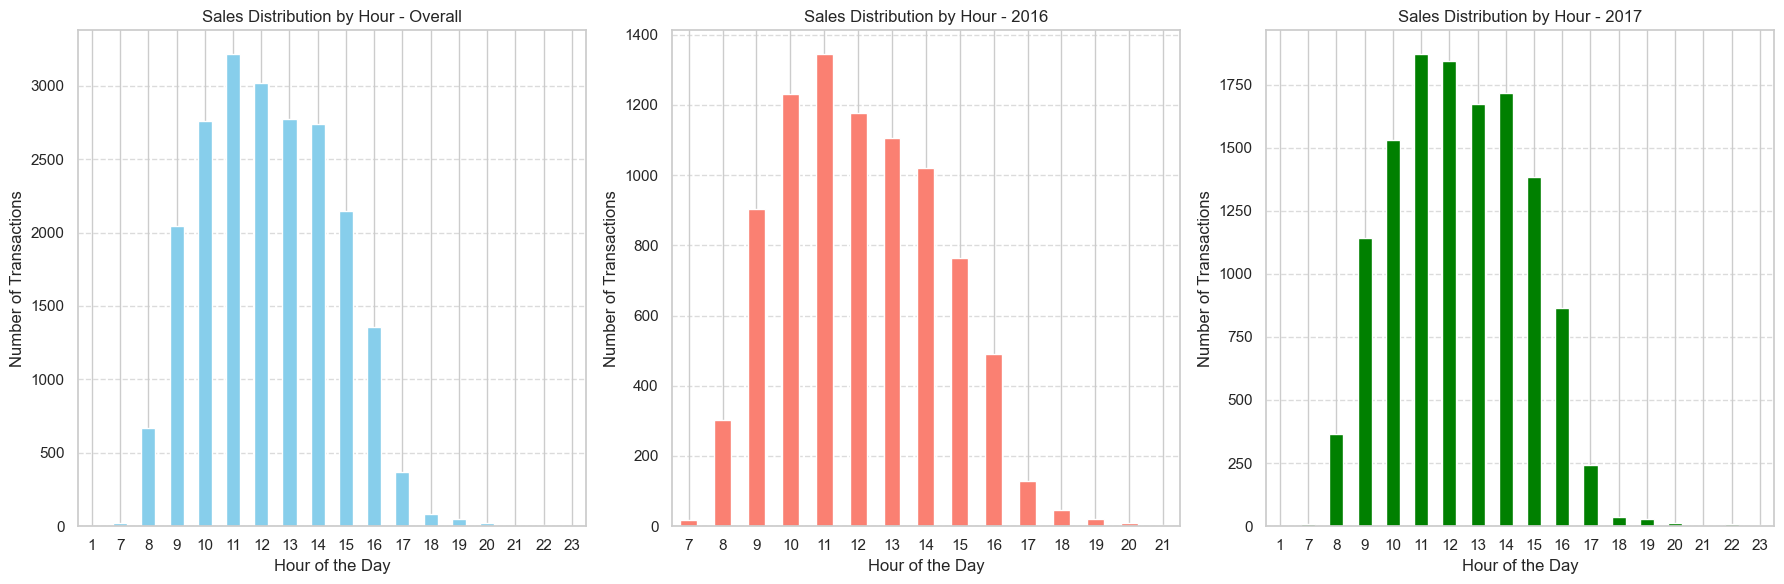

In [73]:
# Group by hour and count the number of transactions for each DataFrame
sales_by_hour_df = df.groupby(df['Time'].dt.hour)['Transaction'].count()
sales_by_hour_2016 = df_2016.groupby(df_2016['Time'].dt.hour)['Transaction'].count()
sales_by_hour_2017 = df_2017.groupby(df_2017['Time'].dt.hour)['Transaction'].count()

# Plot the distribution of sales by hour for each DataFrame
plt.figure(figsize=(18, 6))

# df
plt.subplot(1, 3, 1)
sales_by_hour_df.plot(kind='bar', color='skyblue')
plt.xlabel('Hour of the Day')
plt.ylabel('Number of Transactions')
plt.title('Sales Distribution by Hour - Overall')
plt.xticks(rotation=0)
plt.grid(axis='y', linestyle='--', alpha=0.7)

# df_2016
plt.subplot(1, 3, 2)
sales_by_hour_2016.plot(kind='bar', color='salmon')
plt.xlabel('Hour of the Day')
plt.ylabel('Number of Transactions')
plt.title('Sales Distribution by Hour - 2016')
plt.xticks(rotation=0)
plt.grid(axis='y', linestyle='--', alpha=0.7)

# df_2017
plt.subplot(1, 3, 3)
sales_by_hour_2017.plot(kind='bar', color='green')
plt.xlabel('Hour of the Day')
plt.ylabel('Number of Transactions')
plt.title('Sales Distribution by Hour - 2017')
plt.xticks(rotation=0)
plt.grid(axis='y', linestyle='--', alpha=0.7)

plt.tight_layout()
plt.show()

## Sales Distribution (Daily)

As seen in the distribution charts: 
    - 2016: only contains data for 2 months, it can be seen as slow decay in the sales
    - 2017: contains the lowest transaction day (01/01/2017) and the highest ever sales. (Sales are more or less contstant with regular peaks and decreases following a pattern. 

/var/folders/wf/hhls5kc15k165gzt06s69rnc0000gn/T/ipykernel_20912/3862894962.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_2016['Date'] = pd.to_datetime(df_2016['Date'])
/var/folders/wf/hhls5kc15k165gzt06s69rnc0000gn/T/ipykernel_20912/3862894962.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_2017['Date'] = pd.to_datetime(df_2017['Date'])


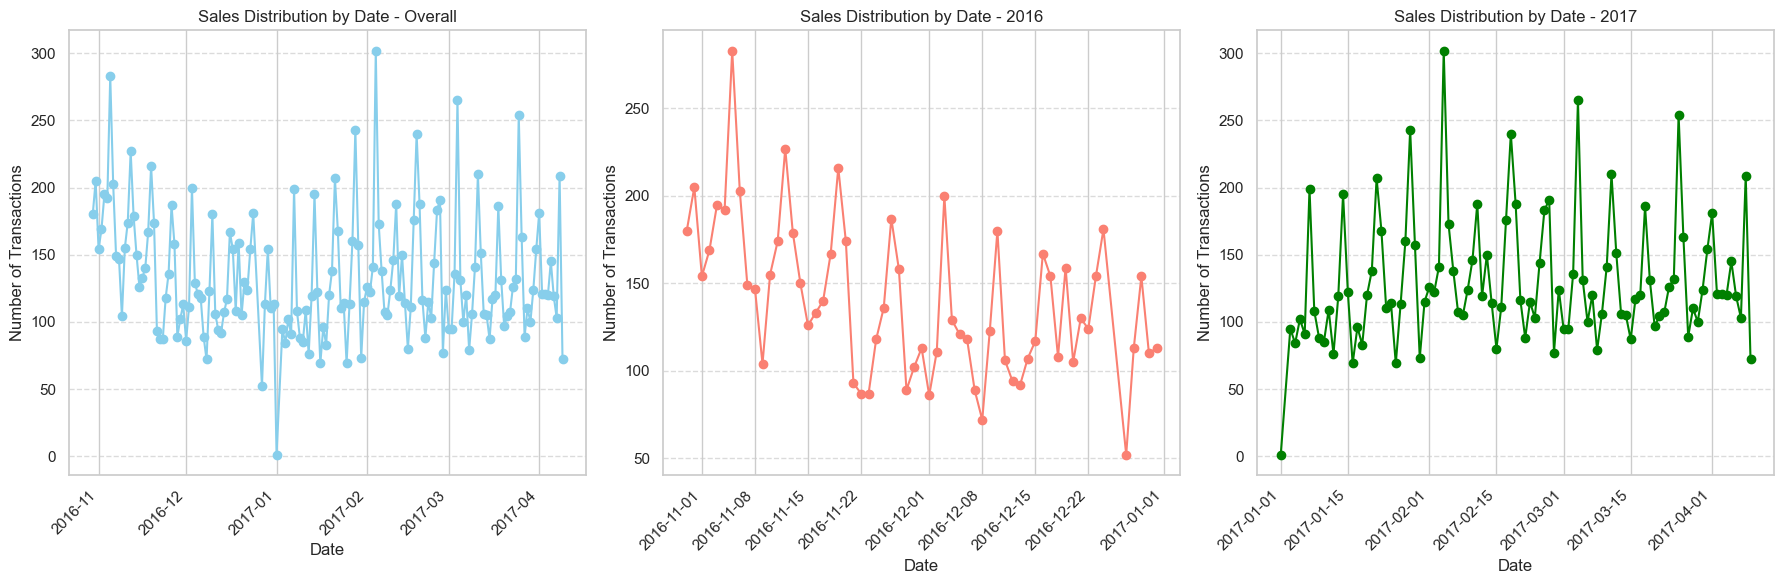

In [83]:
df['Date'] = pd.to_datetime(df['Date'])
df_2016['Date'] = pd.to_datetime(df_2016['Date'])
df_2017['Date'] = pd.to_datetime(df_2017['Date'])

# Group by date and count the number of transactions for each DataFrame
sales_by_date_df = df.groupby(df['Date'])['Transaction'].count()
sales_by_date_2016 = df_2016.groupby(df_2016['Date'])['Transaction'].count()
sales_by_date_2017 = df_2017.groupby(df_2017['Date'])['Transaction'].count()

# Plot the distribution of sales by date for each DataFrame
plt.figure(figsize=(18, 6))

# DF
plt.subplot(1, 3, 1)
sales_by_date_df.plot(kind='line', marker='o', color='skyblue')
plt.xlabel('Date')
plt.ylabel('Number of Transactions')
plt.title('Sales Distribution by Date - Overall')
plt.xticks(rotation=45, ha='right') 
plt.grid(axis='y', linestyle='--', alpha=0.7)

# 2016
plt.subplot(1, 3, 2)
sales_by_date_2016.plot(kind='line', marker='o', color='salmon')
plt.xlabel('Date')
plt.ylabel('Number of Transactions')
plt.title('Sales Distribution by Date - 2016')
plt.xticks(rotation=45, ha='right')  
plt.grid(axis='y', linestyle='--', alpha=0.7)

# 2017
plt.subplot(1, 3, 3)
sales_by_date_2017.plot(kind='line', marker='o', color='green')
plt.xlabel('Date')
plt.ylabel('Number of Transactions')
plt.title('Sales Distribution by Date - 2017')
plt.xticks(rotation=45, ha='right')  
plt.grid(axis='y', linestyle='--', alpha=0.7)

plt.tight_layout()
plt.show()